# <font color='blue'>**LABORATORIO 1. Visión computacional Tradicional y ANN´s aplicadas a problemas de clasificación de imágenes**

<font color='red'>Integrantes (Máximo 3 personas):

<font color='red'>Nombres y Apellidos con Codigo

Gabriel Jeannot, 2185887\
Diego Perea, 2185751\
Samir Hassan, 2190041 \
Carlos Osorio 2230894

<font color='red'>

Las CNN's en general se consideran buenos clasificadores, sin embargo estas soluciones tienden a ser consideradas cajas negras. Una manera de comenzar a entender los procesos que se suceden al interior de sistemas de clasificación es usar técnicas tradicionales.

La base de este tipo de clasificadores es el sistema que se use para extraer características. En clase, hemos realizado un pequeño modelo haciendo uso de herramientas básicas como : SIFT (Detector/Descriptor) , VBoW y MLP.

Siga las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas.
import numpy as np
from matplotlib import pyplot as plt
import cv2
import random
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import os
import pathlib
from skimage.feature import hog

In [ ]:
# Vamos a usar el Sign Language Digits Dataset
#By Turkey Ankara Ayrancı Anadolu High School Students.

!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git


Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [ ]:
#Esta parte esta hecha para ustedes.
#Se les pide que intenten seguir el código y entender
#lo que se hace y el porque se hace. Que tan importante es usar pathlib en este caso?

sld_dir = pathlib.Path('Sign-Language-Digits-Dataset/Dataset')
copia_imgs = pathlib.Path('Sign-Language-Digits-Dataset/Datasetcopy')
print(len(list(sld_dir.glob('*/*.JPG'))))



2062


<font color='red'>Punto 1 (0.5). Preprocesamiento</font>.

El pre-procesamiento de imagenes es una tarea fundamental cuando se desea que la IA trabaje correctamente.

Lea el documento que aparece en este [link](https://medium.com/spidernitt/image-preprocessing-why-is-it-necessary-8895b8b08c1d), el cual aborda este tema de una manera clara y concisa.

(a) Realice el código necesario para cumplir con la labor de pre-procesamiento del dataset dado, indicando cual o cuales técnicas utilizó y la razón que tuvo para usarlas.

(b) Realice un código que le permita mostrar nueve imagenes aleatorias seleccionadas del dataset, mostrando el antes y el despues del pre-procesamiento.


In [ ]:
#Pegue y ejecute aquí el código para la tarea de preprocesamiento.

#Se define una funcion para cargar las imagenes y acomodarlas en diccionarios
#Se aprovecha a crear dos rutas de escritura diferentes con el fin de preprocesar las imagenes y tener las originales para compararlas
def cargar_imagenes(folder, foldercopy):
  for foldername in os.listdir(folder):
    categoria=[]
    cat_copy =[]
    print(foldername)
    ruta = folder/foldername
    ruta_copy = foldercopy/foldername
    imgArray=[]
    i = 0
    for filename in os.listdir(ruta):
      img = cv2.imread(str(ruta / filename), cv2.IMREAD_GRAYSCALE)
      equ_img = cv2.equalizeHist(img)
      laplacian_img = cv2.Laplacian(equ_img, cv2.CV_64F)

      if img is not None:
        categoria.append(equ_img)
        cat_copy.append(laplacian_img)
    imagenes[foldername]= categoria
    imagenes_copy[foldername] = cat_copy

  return imagenes, imagenes_copy


In [ ]:
#Se crean los diccionarios para ejecutar la funcion de cargar imagenes
imagenes= {}
imagenes_copy={}
train = cargar_imagenes(sld_dir, copia_imgs)

#Se crea una variable de proporcion para dividir el dataset
proporcion_entrenamiento = 0.7


#Se crean los diccionarios para dividir el dataset en datos de entrenamiento y de testeo
prueba_imagenes = {}
entrenamiento_imagenes = {}
#prueba_imagenes = {}

#Se dividen los datos
for categoria, imagenes in imagenes.items():
    total_imagenes = len(imagenes)
    limite_entrenamiento = int(total_imagenes * proporcion_entrenamiento)

    entrenamiento_imagenes[categoria] = imagenes[:limite_entrenamiento]
    prueba_imagenes[categoria] = imagenes[limite_entrenamiento:]

#Se verifica que queden bien divididos (NO USAR)
#for categoria, prueba_imagenes in prueba_imagenes.items():
    #total_imagenes1 = len(prueba_imagenes)
    #print(f"Total de imágenes en la categoría {categoria}: {total_imagenes1}")


0
3
5
9
8
6
7
1
2
4


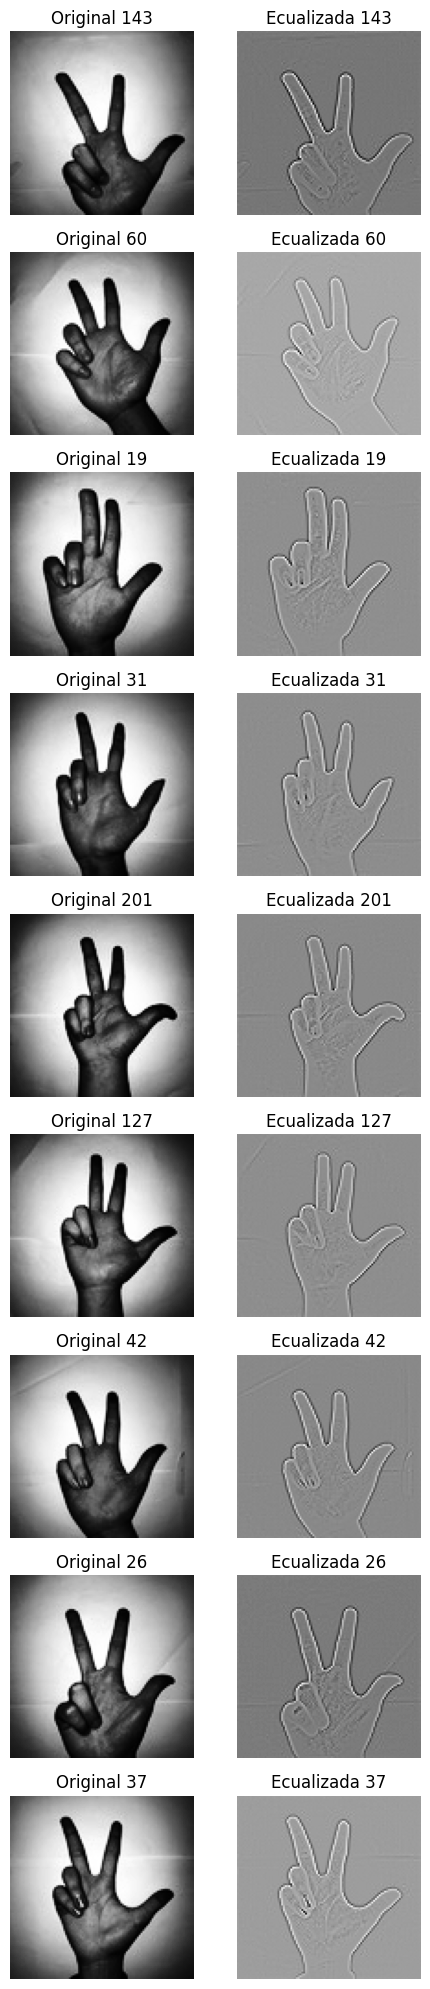

In [ ]:

#Se crea un codigo para visualizar aleatoriamente 9 imagenes por categoria y compararlas con sus preprocesadas
ruta = '3'
foldername = ruta

#Se crean 9 índices aleatorios para cada diccionario
indices_aleatorios = random.sample(range(len(train[0][foldername])), 9)

# Se configura la figura para mostrar las imágenes
fig, axs = plt.subplots(9, 2, figsize=(5, 20))

# Se itera sobre los subplots y se muestran las imágenes
for i, idx in enumerate(indices_aleatorios):
    row = i
    col = 0

    imagen_original = train[0][foldername][idx]
    imagen_ecualizada = train[1][foldername][idx]

    axs[row, col].imshow(imagen_original, cmap='gray')
    axs[row, col].set_title(f'Original {idx}')
    axs[row, col].axis('off')

    axs[row, col + 1].imshow(imagen_ecualizada, cmap='gray')
    axs[row, col + 1].set_title(f'Ecualizada {idx}')
    axs[row, col + 1].axis('off')

# Se ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()







<font color='red'>Punto 2 (2.0). Cree un clasificador tradicional para el dataset dado, usando SIFT como Detector/Descriptor.

(1.0) Utilice los conocimientos adquiridos en clase acerca de visión computacional tradicional: detectores/descriptores, BoVW y ANN´s para que cree, entrene y valide un CLASIFICADOR TRADICIONAL.

(0.5) ¿Cómo seleccionó el numero de palabras en su diccionario? (Lea acerca de la técnica KNN y el ELBOW METHOD, para crear una función que le permita obtener el K óptimo)

(0.5) ¿Como seleccionó o creó la estrucutra de su modelo MLP? (De una explicación clara y concisa. Tenga en cuenta dentro de su explicación dar respuesta a la selección de: numero de capas, numero de neuronas por capa, función de activación, optimizador)



In [ ]:
#Se empiezan a crear las caracteristicas o keypoints de las imagenes y se las almacena en un arreglo que tiene
#En la primera pocision [0] el conjunto de caracteristicas de todas las imagenes del data set en conjunto
#En la segunda pocision [1] un conjunto de caracteristicas de todas las imagenes del data set separadas por categoria
def features(imagenes):
  sift = cv2.SIFT_create()
  feat_all = []
  featXcat = {}

  for key, imgs in imagenes.items():
    featXimg =[]
    for img in imgs:
      kp, desc = sift.detectAndCompute(img, None)
      feat_all.extend(desc)
      featXimg.append(desc)

    featXcat[key] = featXimg

  return [feat_all, featXcat]

In [ ]:
#Se aplica la funcion features al data set en cuestion
feat_train = features(entrenamiento_imagenes)

In [ ]:
#Se define una funcion para auto agrupar las caracteristicas mediante el metodo Kmeans
def clustering(k , lista):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(lista)
  diccionario = kmeans.cluster_centers_

  return diccionario

In [ ]:
#Esta celda de codigo se ejecuta unicamente con el fin de realizar el metodo ELBOW para determinar el K optimo
#que deberia tener el diccionario, esto se determina finalmente mediante analisis visual de la tabla (k=25 aprox)

# Calcular inercias para diferentes valores de K
inertia_values = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(feat_train[0])  # Reemplaza tus_caracteristicas con tus datos
    inertia_values.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), inertia_values, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), inertia_values, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(range(1, 50))
plt.show()

In [ ]:
#Pegue y ejecute aquí su código del entrenamiento, validación de su clasificador tradicional

#Se define una funcion para hallar el indice que ubicara a cada caracteristica en el histograma
def find_idx(feat, center):
  count = 0
  ind = 0
  for i in range (len(center)):
    if (i==0):
      count = distance.euclidean(feat, center[i])

    else:
      dist = distance.euclidean(feat, center[i])
      if(dist < count):
        ind = i
        count = dist

  return ind

In [ ]:
#Se define una funcion para hallar el histograma de frecuencias de cada imagen del data set en funcion de la cantidad
#de palabras del diccionario.
def img_histos(bovw_feat, centers):
  dict_feat={}
  for key, value in bovw_feat.items():
    imagens=[]
    for img in value:
      histo = np.zeros(len(centers))
      for each_feat in img:
        idx = find_idx(each_feat, centers)
        histo[idx]+=1
      imagens.append(histo)
    dict_feat[key]= imagens
  return dict_feat

In [ ]:

#Se ejecuta la funcion de clustering con el numero de K palabras definido previamente
k=50
diccionario_vis = clustering(k, feat_train[0])

#Se ejecuta la funcion que "entrena" el modelo de bolsa de palabras visuales
bovw_train = img_histos(feat_train[1], diccionario_vis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Se vectoriza tanto el valor como la etiqueta de cada item del diccionario
def preparar_datos(diccio):
  y = []
  x = []
  for key, values in diccio.items():
    for histo in values:
      x.append(histo)
      y.append(key)
  return np.array(x), np.array(y)

In [ ]:
#Se ejecuta la funcion anterior y se guarda en dos arreglos, uno para los labels y otro para los valores
x_train, y_train = preparar_datos(bovw_train)

In [ ]:
#Se repite el proceso para el conjunto de TEST
feat_test = features(prueba_imagenes)[1]
bovw_test = img_histos(feat_test, diccionario_vis)
x_test, y_test = preparar_datos(bovw_test)

In [ ]:
#Se estandarizan los datos (normalizar)
std = StandardScaler().fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

In [ ]:
#Se entrenan los datos a traves de una red convolucional tradicional (MLP),
#que salen de un previo tratamiento a traves del metodo bolsa de palabras visuales y posteriormente normalizacion
# Entrena el modelo MLP

#se ha elegido una red relativamente pequeña , en el cual el numero de neuronas fue de prueba y error , cual seria la mas adecuada
# Se seleccionó ReLU ya que es una elección común debido a su eficiencia y buen desempeño en una amplia gama de problemas
#Se seleccionó Adam ya que es una elección sólida y suele funcionar bien en muchas situaciones
# Crear un modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(80, 10), activation='relu', solver='adam', max_iter=1)

# Listas para almacenar las métricas
train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

# Entrenar el modelo y registrar métricas en cada época
num_epochs = 600  # Cambia este valor según tu preferencia
for epoch in range(num_epochs):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))

    # Calcular y registrar la pérdida y la precisión en el conjunto de entrenamiento
    y_train_pred = mlp.predict(x_train)
    train_loss = mlp.loss_
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calcular y registrar la pérdida y la precisión en el conjunto de prueba
    y_test_pred = mlp.predict(x_test)
    test_loss = mlp.loss_
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

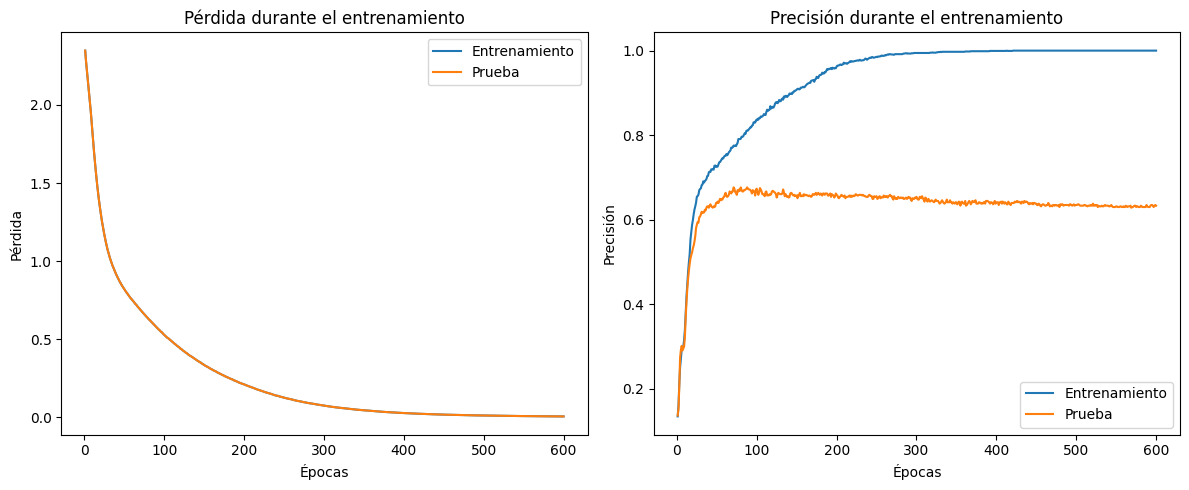

Accuracy en entrenamiento: 1.00
Accuracy en prueba: 0.63
Loss en entrenamiento: 0.01
Loss en prueba: 0.01


In [ ]:
# Crear gráficos
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label='Entrenamiento')
plt.plot(epochs, test_loss_history, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history, label='Entrenamiento')
plt.plot(epochs, test_accuracy_history, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

plt.tight_layout()
plt.show()

print(f'Accuracy en entrenamiento: {train_accuracy:.2f}')
print(f'Accuracy en prueba: {test_accuracy:.2f}')
print(f'Loss en entrenamiento: {train_loss:.2f}')
print(f'Loss en prueba: {test_loss:.2f}')

In [ ]:
#Una vez entrenado el modelo, se predicen los datos del conjunto de datos de testeo
p = mlp.predict(x_test)

In [ ]:
#Pegue y ejecute aquí su código de la metricas usadas.

#Se utiliza como principal metrica la matriz de confusion
M = confusion_matrix(y_test, p)

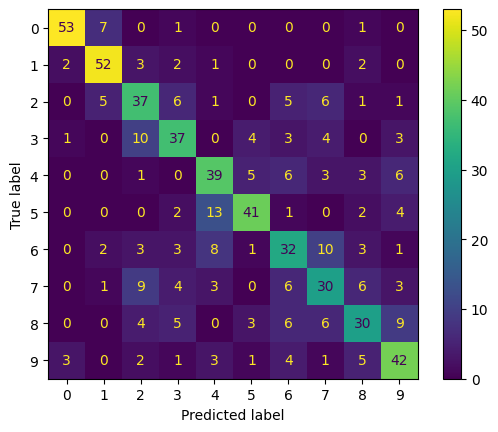

In [ ]:
cm = confusion_matrix(y_test, p, labels = mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = mlp.classes_)
disp.plot()
plt.show()

In [ ]:
#Posteriormente se utiliza un reporte de resultados con metricas como precision, accuracy y recall del modelo.
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        62
           1       0.78      0.84      0.81        62
           2       0.54      0.60      0.56        62
           3       0.61      0.60      0.60        62
           4       0.57      0.62      0.60        63
           5       0.75      0.65      0.69        63
           6       0.51      0.51      0.51        63
           7       0.50      0.48      0.49        62
           8       0.57      0.48      0.52        63
           9       0.61      0.68      0.64        62

    accuracy                           0.63       624
   macro avg       0.63      0.63      0.63       624
weighted avg       0.63      0.63      0.63       624



<font color='red'>Punto 3 (1.5). Cree un clasificador tradicional para el dataset dado, usando HOG.</font>

(1.0) Lea acerca del HOG (Histogram of Gradients) y uselo como entrada a su CLASIFICADOR TRADICIONAL, sustituyendo de esta manera a SIFT.
<font color='red'> [Nota: Solo puede cambiar el vector de entrada a su modelo.]

(0.25) De una explicación corta acerca (No más de 10 líneas) de como HOG modifica el código implementado.

R// Originalmente utiliza el método SIFT (Scale-Invariant Feature Transform) para extraer características de imágenes. Al cambiar a HOG (Histogram of Oriented Gradients), se modifica la forma en que se extraen las características, lo que implica el uso de histogramas de gradientes orientados en lugar de descriptores SIFT. Esto altera la representación de las imágenes y la forma en que se procesan, lo que puede afectar significativamente el rendimiento del modelo de clasificación, permitiendo una comparación de la efectividad de estos dos métodos de extracción de características en la tarea de clasificación de imágenes.


(0.25) Muestre una tabla comparando las metricas obtenidas. (SIFT Vs HOG). Realice un análisis de los resultados obtenidos.

In [ ]:
from skimage.feature import hog

In [ ]:
#Pegue y ejecute aquí su código del entrenamiento, validación de su clasificador tradicional

#Se empiezan a crear las caracteristicas o keypoints de las imagenes y se las almacena en un arreglo que tiene
#En la primera pocision [0] el conjunto de caracteristicas de todas las imagenes del data set en conjunto
#En la segunda pocision [1] un conjunto de caracteristicas de todas las imagenes del data set separadas por categoria
def featuresHog(imagenes):
    feat_all_hog = []
    featXcat_hog = {}

    for key, imgs in imagenes.items():
        featXimg = []
        for img in imgs:
            # Aquí se calcula el descriptor HOG para cada imagen
            fd, hog_image = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            feat_all_hog.extend(fd)
            featXimg.append(fd)

        featXcat_hog[key] = featXimg

    return [feat_all_hog, featXcat_hog]

In [ ]:
#Se aplica la funcion features al data set en cuestion
feat_train_hog = featuresHog(entrenamiento_imagenes)

In [ ]:
#Se define una funcion para auto agrupar las caracteristicas mediante el metodo Kmeans
def clusteringHog(k, lista):
    kmeans = KMeans(n_clusters=k)
    lista = np.array(lista)  # Convierte la lista en una matriz 2D
    lista = lista.reshape(-1, 1)  # Reshape para convertir en 2D
    kmeans.fit(lista)
    diccionario_hog = kmeans.cluster_centers_

    return diccionario_hog

In [ ]:
#Se define una funcion para hallar el indice que ubicara a cada caracteristica en el histograma
def find_idx_hog(feat, center):
    count = 0
    ind_hog = 0
    for i in range(len(center)):
        if (i == 0):
            count = distance.euclidean(feat, center[i])

        else:
            dist = distance.euclidean(feat, center[i])
            if (dist < count):
                ind = i
                count = dist

    return ind_hog

In [ ]:
# Se define una función para hallar el histograma de frecuencias de cada imagen del dataset en función de la cantidad
# de palabras del diccionario.
# Se define una función para hallar el histograma de frecuencias de cada imagen del dataset en función de la cantidad
# de palabras del diccionario.
def img_histos_hog(bovw_feat, centers):
    dict_feat_hog = {}
    for key, value in bovw_feat.items():
        imagens = []
        for img in value:
            histo = np.histogram(img, bins=len(centers))[0]  # Usar el histograma directamente
            imagens.append(histo)
        dict_feat_hog[key] = imagens
    return dict_feat_hog

In [ ]:
# Se ejecuta la función de clustering con el número de K palabras definido previamente
k = 50
diccionario_vis_hog = clusteringHog(k, feat_train_hog[0])

# Se ejecuta la función que "entrena" el modelo de bolsa de palabras visuales
bovw_train_hog = img_histos_hog(feat_train_hog[1], diccionario_vis_hog)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Se vectoriza tanto el valor como la etiqueta de cada ítem del diccionario
def preparar_datos_hog(diccio):
    y = []
    x = []
    for key, values in diccio.items():
        for histo in values:
            x.append(histo)
            y.append(key)
    return np.array(x), np.array(y)

In [ ]:
# Se ejecuta la función anterior y se guarda en dos arreglos, uno para los labels y otro para los valores
x_train_hog, y_train_hog = preparar_datos_hog(bovw_train_hog)

In [ ]:
# Se repite el proceso para el conjunto de TEST
feat_test_hog = featuresHog(prueba_imagenes)[1]
bovw_test_hog = img_histos_hog(feat_test_hog, diccionario_vis_hog)
x_test_hog, y_test_hog = preparar_datos_hog(bovw_test_hog)

In [ ]:
# Se estandarizan los datos (normalizar)
std_hog = StandardScaler().fit(x_train_hog)
x_train_hog = std_hog.transform(x_train_hog)
x_test_hog = std_hog.transform(x_test_hog)

In [ ]:
# Se entrenan los datos a través de una red convolucional tradicional (MLP),
# que salen de un previo tratamiento a través del método bolsa de palabras visuales y posteriormente normalización
# Entrena el modelo MLP
mlpHog = MLPClassifier(hidden_layer_sizes=(160,80, 10), activation='relu', solver='adam', max_iter=1000)

mlpHog.fit(x_train_hog, y_train_hog)

# Predice los resultados en el conjunto de prueba
y_train_pred_hog = mlpHog.predict(x_train_hog)
y_test_pred_hog = mlpHog.predict(x_test_hog)

# Calcula y muestra el accuracy y la pérdida en ambos conjuntos
train_accuracy_hog = accuracy_score(y_train_hog, y_train_pred_hog)
test_accuracy_hog = accuracy_score(y_test_hog, y_test_pred_hog)

print(f'Accuracy en entrenamiento: {train_accuracy_hog:.2f}')
print(f'Accuracy en prueba: {test_accuracy_hog:.2f}')

# También puedes calcular la pérdida utilizando la función `loss_`
train_loss_hog = mlpHog.loss_
print(f'Loss en entrenamiento: {train_loss_hog:.2f}')

Accuracy en entrenamiento: 1.00
Accuracy en prueba: 0.17
Loss en entrenamiento: 0.05


In [ ]:
#Se entrenan los datos
#que salen de un previo tratamiento a traves del metodo bolsa de palabras visuales y posteriormente normalizacion
#se ha elegido una red relativamente pequeña , en el cual el numero de neuronas fue de prueba y error , cual seria la mas adecuada
# Se seleccionó ReLU ya que es una elección común debido a su eficiencia y buen desempeño en una amplia gama de problemas
#Se seleccionó Adam ya que es una elección sólida y suele funcionar bien en muchas situaciones
mlpHog = MLPClassifier(hidden_layer_sizes=(100,10), activation='relu', solver='adam', max_iter=1)

# Listas para almacenar las métricas
train_loss_history_hog = []
train_accuracy_history_hog = []
test_loss_history_hog = []
test_accuracy_history_hog = []

# Entrenar el modelo y registrar métricas en cada época
num_epochs_hog = 800  # Cambia este valor según tu preferencia
for epoch in range(num_epochs_hog):
    mlpHog.partial_fit(x_train_hog, y_train_hog, classes=np.unique(y_train_hog))

    # Calcular y registrar la pérdida y la precisión en el conjunto de entrenamiento
    y_train_pred_hog = mlpHog.predict(x_train_hog)
    train_loss_hog = mlpHog.loss_
    train_accuracy_hog = accuracy_score(y_train_hog, y_train_pred_hog)

    # Calcular y registrar la pérdida y la precisión en el conjunto de prueba
    y_test_pred_hog = mlpHog.predict(x_test_hog)
    test_loss_hog = mlpHog.loss_
    test_accuracy_hog = accuracy_score(y_test_hog, y_test_pred_hog)

    train_loss_history_hog.append(train_loss_hog)
    train_accuracy_history_hog.append(train_accuracy_hog)
    test_loss_history_hog.append(test_loss_hog)
    test_accuracy_history_hog.append(test_accuracy_hog)

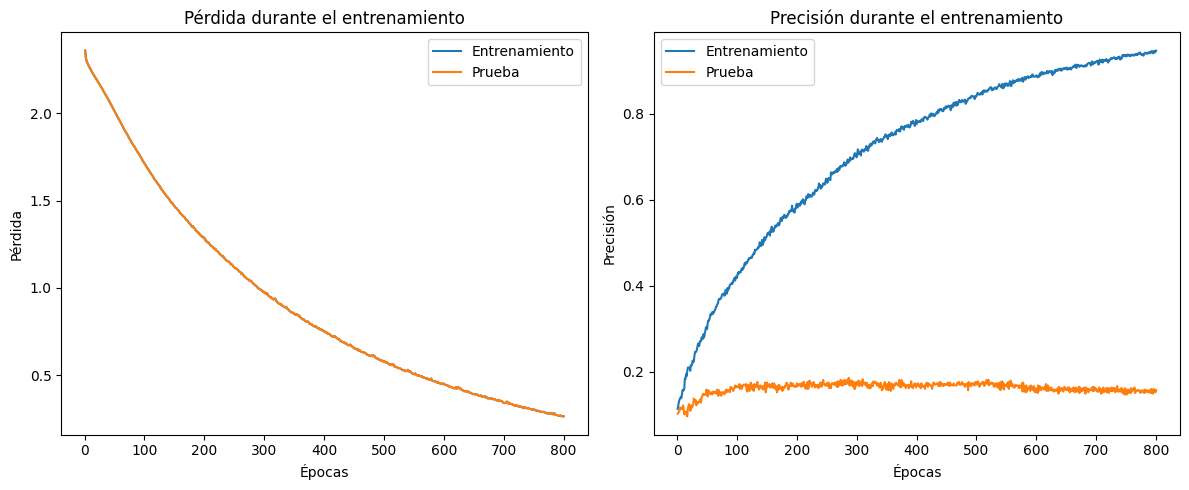

Accuracy en entrenamiento: 0.95
Accuracy en prueba: 0.16
Loss en entrenamiento: 0.26
Loss en prueba: 0.26


In [ ]:
# Crear gráficos HOG (Histogram of Oriented Gradients)
epochs_hog = range(1, num_epochs_hog + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_hog, train_loss_history_hog, label='Entrenamiento')
plt.plot(epochs_hog, test_loss_history_hog, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs_hog, train_accuracy_history_hog, label='Entrenamiento')
plt.plot(epochs_hog, test_accuracy_history_hog, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

plt.tight_layout()
plt.show()

print(f'Accuracy en entrenamiento: {train_accuracy_hog:.2f}')
print(f'Accuracy en prueba: {test_accuracy_hog:.2f}')
print(f'Loss en entrenamiento: {train_loss_hog:.2f}')
print(f'Loss en prueba: {test_loss_hog:.2f}')

In [ ]:
#Una vez entrenado el modelo, se predicen los datos del conjunto de datos de testeo
p_hog = mlpHog.predict(x_test_hog)

In [ ]:
#Pegue y ejecute aquí su código de la metricas usadas.

#Se utiliza como principal metrica la matriz de confusion
M_hog = confusion_matrix(y_test_hog, p_hog)

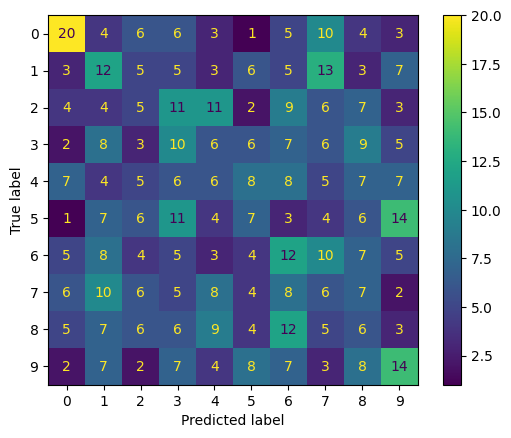

In [ ]:
cmHog = confusion_matrix(y_test_hog, p_hog, labels = mlpHog.classes_)
dispHog = ConfusionMatrixDisplay(confusion_matrix = cmHog, display_labels = mlpHog.classes_)
dispHog.plot()
plt.show()


In [ ]:
#Posteriormente se utiliza un reporte de resultados con metricas como precision, accuracy y recall del modelo.
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.01      0.02      0.01        62
           1       0.00      0.00      0.00        62
           2       0.07      0.08      0.08        62
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        63
           5       0.03      0.02      0.02        63
           6       0.10      0.06      0.08        63
           7       0.24      0.10      0.14        62
           8       0.14      0.02      0.03        63
           9       0.11      0.40      0.17        62

    accuracy                           0.07       624
   macro avg       0.07      0.07      0.05       624
weighted avg       0.07      0.07      0.05       624



In [ ]:
#Pegue y ejecute aquí su código de la metricas usadas. Acompañelo de la tabla comparativa (SIFT vs HOG)


<p align="justify"> Originalmente utiliza el método SIFT (Scale-Invariant Feature Transform) para extraer características de imágenes. Al cambiar a HOG (Histogram of Oriented Gradients), se modifica la forma en que se extraen las características, lo que implica el uso de histogramas de gradientes orientados en lugar de descriptores SIFT. Esto altera la representación de las imágenes y la forma en que se procesan, lo que puede afectar significativamente el rendimiento del modelo de clasificación, permitiendo una comparación de la efectividad de estos dos métodos de extracción de características en la tarea de clasificación de imágenes.
<p>

## **Pegue y ejecute aquí su código de la metricas usadas. Acompañelo de la tabla comparativa (SIFT vs HOG)**

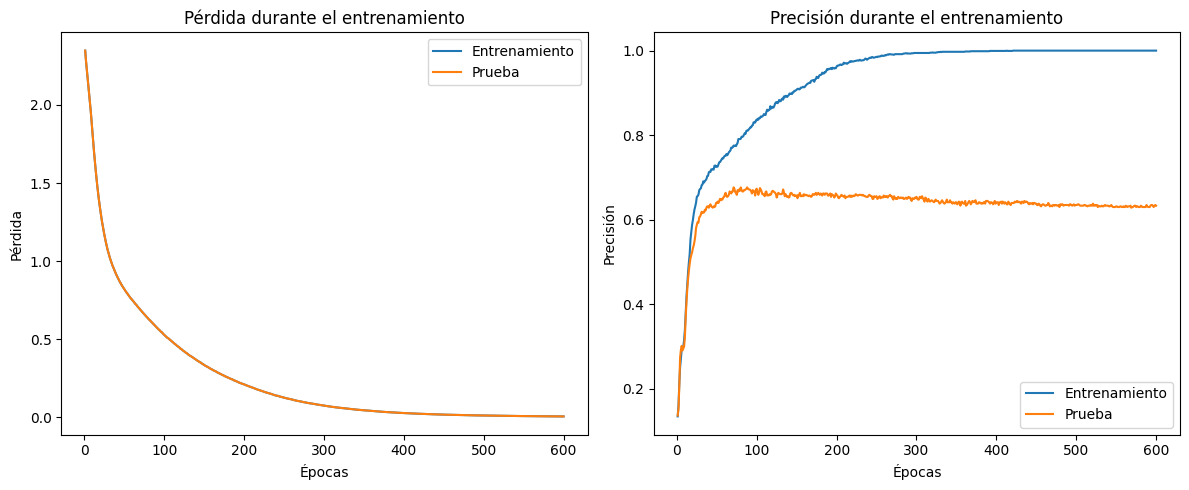

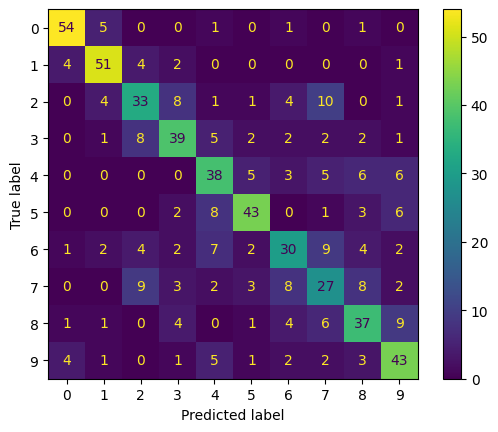

Accuracy en entrenamiento: 1.00
Accuracy en prueba: 0.63
Loss en entrenamiento: 0.01
Loss en prueba: 0.01


In [ ]:
# Crear gráficos SIFT
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label='Entrenamiento')
plt.plot(epochs, test_loss_history, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history, label='Entrenamiento')
plt.plot(epochs, test_accuracy_history, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

plt.tight_layout()
plt.show()

# Crear Matrix SIFT

p = mlp.predict(x_test)

M = confusion_matrix(y_test, p)

cm = confusion_matrix(y_test, p, labels = mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = mlp.classes_)
disp.plot()
plt.show()

print(f'Accuracy en entrenamiento: {train_accuracy:.2f}')
print(f'Accuracy en prueba: {test_accuracy:.2f}')
print(f'Loss en entrenamiento: {train_loss:.2f}')
print(f'Loss en prueba: {test_loss:.2f}')

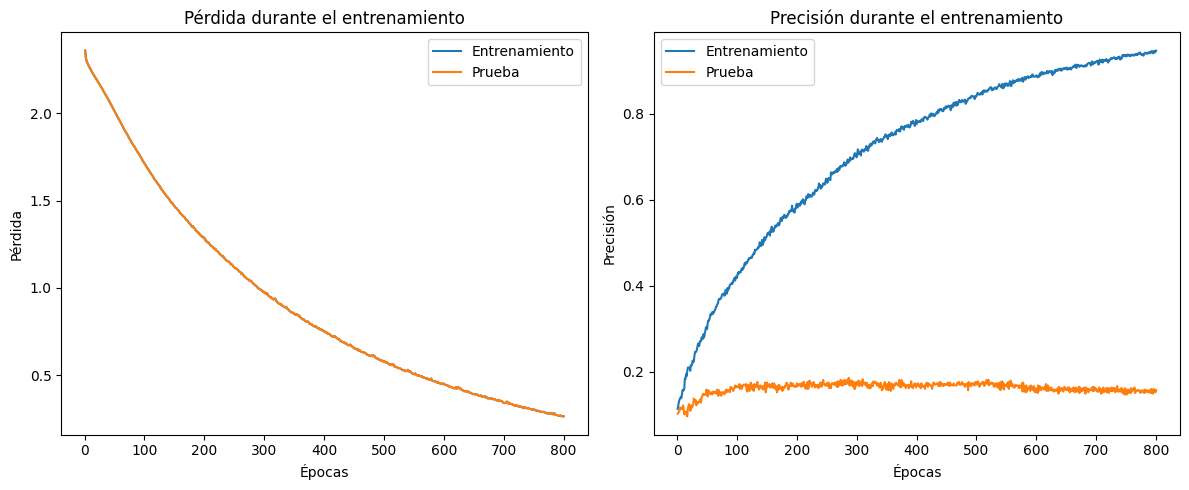

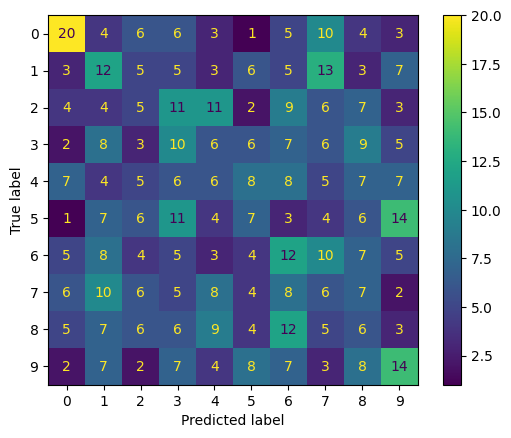

Accuracy en entrenamiento: 0.95
Accuracy en prueba: 0.16
Loss en entrenamiento: 0.26
Loss en prueba: 0.26


In [ ]:
# Crear gráficos HOG (Histogram of Oriented Gradients)
epochs_hog = range(1, num_epochs_hog + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_hog, train_loss_history_hog, label='Entrenamiento')
plt.plot(epochs_hog, test_loss_history_hog, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs_hog, train_accuracy_history_hog, label='Entrenamiento')
plt.plot(epochs_hog, test_accuracy_history_hog, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

plt.tight_layout()
plt.show()

# Crear Matrix HOG (Histogram of Oriented Gradients)
p_hog = mlpHog.predict(x_test_hog)

M_hog = confusion_matrix(y_test_hog, p_hog)

cmHog = confusion_matrix(y_test_hog, p_hog, labels = mlpHog.classes_)
dispHog = ConfusionMatrixDisplay(confusion_matrix = cmHog, display_labels = mlpHog.classes_)
dispHog.plot()
plt.show()

print(f'Accuracy en entrenamiento: {train_accuracy_hog:.2f}')
print(f'Accuracy en prueba: {test_accuracy_hog:.2f}')
print(f'Loss en entrenamiento: {train_loss_hog:.2f}')
print(f'Loss en prueba: {test_loss_hog:.2f}')

| Método         | Precisión en entrenamiento | Precisión en prueba | Pérdida en entrenamiento y prueba |
|----------------|---------------------------|---------------------|-----------------------------------|
| **SIFT**       | 100%                      | 63%                 | Bajas (0.01)                      |
| **HOG**        | 95%                       | 16%                 | Altas (0.26)                      |




<p align="justify">

**Método SIFT:**

- **Precisión en entrenamiento:** 100%: Esto sugiere que el modelo basado en SIFT se ajusta perfectamente a los datos de entrenamiento, lo que podría indicar un posible sobreajuste (overfitting).
- **Precisión en prueba: 63%:** Aunque la precisión en el conjunto de prueba no es perfecta, sigue siendo bastante aceptable y sugiere que el modelo generaliza bien a datos no vistos.
- **Pérdida en entrenamiento y prueba:** Bajas (0.01): Las pérdidas bajas en entrenamiento y prueba son un buen indicativo de que el modelo está aprendiendo eficazmente y no está sobreajustando.

**Método HOG:**

- **Precisión en entrenamiento: 95%:** La precisión en entrenamiento indica un buen ajuste a los datos de entrenamiento, pero no es tan alta como en el método SIFT.
- **Precisión en prueba: 16%:** La precisión en el conjunto de prueba es mucho más baja en comparación con el método SIFT, lo que sugiere que el modelo HOG no generaliza bien a nuevos datos y tiene un rendimiento deficiente en la clasificación de imágenes desconocidas.
- **Pérdida en entrenamiento y prueba: **Altas (0.26): Las pérdidas más altas en entrenamiento y prueba indican que el modelo HOG tiene dificultades para aprender de los datos y generalizar.

Los resultados sugieren que el método SIFT es más efectivo para la tarea de clasificación de imágenes en este conjunto de datos en particular, ya que logra una precisión mucho mayor en el conjunto de prueba. El método HOG parece no ser adecuado para esta tarea y podría requerir ajustes adicionales o un enfoque diferente para mejorar su rendimiento.

<p>

<font color='red'>Punto 4 (1.0). Pruebas adicionales de su mejor Clasificador</font>.

Tome un conjunto de 20 imagenes (use camaras monoculares convencionales), mostrando diferentes digitos del lenguaje de señas. Realice un programa que permita leer las imagenes, pre-procesarlas y dejarlas listas para servir de entrada a su mejor clasificador.  Muestre las imagenes procesadas y el valor de predicción de su red con porcentaje.

In [ ]:

#Obtenemos el conjunto de 20 imágenes a través de GitHub para facilitar su uso desde cualquier dispositivo
!git clone https://github.com/xlgabriel/signlanguajedatasetpredict_zip.git
!mv signlanguajedatasetpredict_zip /content/

sld_dir4  = pathlib.Path('/content/signlanguajedatasetpredict_zip')
copia_imgs4 = pathlib.Path('/content/signlanguajedatasetpredict_zip/Datasetcopy')
print('Cantidad de imágenes:', len(list(sld_dir4 .glob('*/*.jpg'))))

fatal: destination path 'signlanguajedatasetpredict_zip' already exists and is not an empty directory.
mv: 'signlanguajedatasetpredict_zip' and '/content/signlanguajedatasetpredict_zip' are the same file
Cantidad de imágenes: 20


In [ ]:
def cargar_imagenes4(folder4, foldercopy4):
  for foldername4 in os.listdir(folder4):
    categoria4=[]
    cat_copy4 =[]
    print(foldername4)
    ruta4 = folder4/foldername4
    ruta_copy4 = foldercopy4/foldername4
    imgArray4=[]
    i = 0
    for filename4 in os.listdir(ruta4):
      img = cv2.imread(str(ruta4 / filename4), cv2.IMREAD_GRAYSCALE)
      equ_img = cv2.equalizeHist(img)
      laplacian_img = cv2.Laplacian(equ_img, cv2.CV_64F)

      if img is not None:
        categoria4.append(equ_img)
        cat_copy4.append(laplacian_img)
    imagenes4[foldername4]= categoria4
    imagenes_copy4[foldername4] = cat_copy4

  return imagenes4, imagenes_copy4

In [ ]:
cd /content/signlanguajedatasetpredict_zip

/content/signlanguajedatasetpredict_zip


In [ ]:
!rm -r .git
!ls -a

.  ..  0  1  2	3  4  5  6  7  8  9


In [ ]:
#Se crean los diccionarios para ejecutar la funcion de cargar imagenes
imagenes4= {}
imagenes_copy4={}
train4 = cargar_imagenes4(sld_dir4, copia_imgs4)

#Se crea una variable de proporcion para dividir el dataset
proporcion_entrenamiento4 = 0.7


#Se crean los diccionarios para dividir el dataset en datos de entrenamiento y de testeo
prueba_imagenes4 = {}
entrenamiento_imagenes4 = {}
#prueba_imagenes = {}


#Se dividen los datos
for categoria4, imagenes4 in imagenes4.items():
    total_imagenes4 = len(imagenes4)
    limite_entrenamiento4 = int(total_imagenes4 * proporcion_entrenamiento4)

    entrenamiento_imagenes4[categoria4] = imagenes4[:limite_entrenamiento4]
    prueba_imagenes4[categoria4] = imagenes4[limite_entrenamiento4:]

#Se verifica que queden bien divididos (NO USAR)
#for categoria, prueba_imagenes in prueba_imagenes.items():
    #total_imagenes1 = len(prueba_imagenes)
    #print(f"Total de imágenes en la categoría {categoria}: {total_imagenes1}")


0
3
5
9
8
6
7
1
2
4


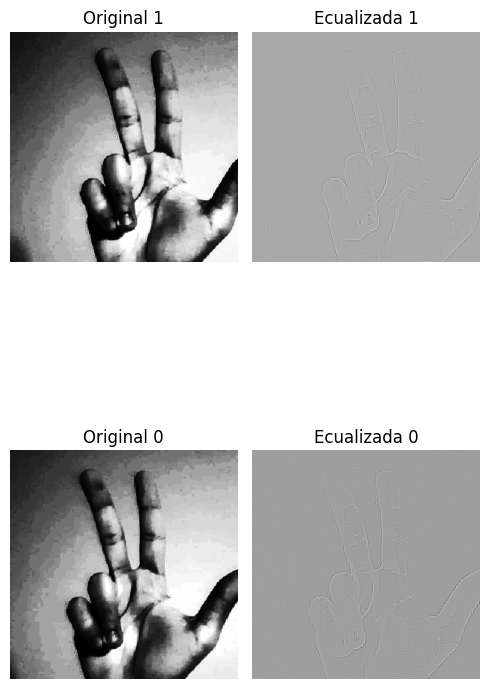

In [ ]:
ruta4 = '3'
foldername = ruta4

# Verifica cuántas imágenes tienes en la categoría '3'
num_imagenes_categoria_3 = len(train4[0].get(foldername, []))

if num_imagenes_categoria_3 >= 2:
    # Si tienes al menos 2 imágenes en la categoría '3', entonces selecciona 2 índices aleatorios
    indices_aleatorios = random.sample(range(num_imagenes_categoria_3), 2)

    # Se configura la figura para mostrar las imágenes
    fig, axs = plt.subplots(2, 2, figsize=(5, 10))

    # Se itera sobre los subplots y se muestran las imágenes
    for i, idx in enumerate(indices_aleatorios):
        row = i
        col = 0

        imagen_original = train4[0][foldername][idx]
        imagen_ecualizada = train4[1][foldername][idx]

        axs[row, col].imshow(imagen_original, cmap='gray')
        axs[row, col].set_title(f'Original {idx}')
        axs[row, col].axis('off')

        axs[row, col + 1].imshow(imagen_ecualizada, cmap='gray')
        axs[row, col + 1].set_title(f'Ecualizada {idx}')
        axs[row, col + 1].axis('off')

    # Se ajusta el espaciado entre subplots
    plt.tight_layout()
    plt.show()
else:
    print(f"No hay suficientes imágenes en la categoría '{foldername}' para seleccionar 2 índices aleatorios.")


In [ ]:
#Se empiezan a crear las caracteristicas o keypoints de las imagenes y se las almacena en un arreglo que tiene
#En la primera pocision [0] el conjunto de caracteristicas de todas las imagenes del data set en conjunto
#En la segunda pocision [1] un conjunto de caracteristicas de todas las imagenes del data set separadas por categoria
def features(imagenes):
  sift = cv2.SIFT_create()
  feat_all = []
  featXcat = {}

  for key, imgs in imagenes.items():
    featXimg =[]
    for img in imgs:
      kp, desc = sift.detectAndCompute(img, None)
      feat_all.extend(desc)
      featXimg.append(desc)

    featXcat[key] = featXimg

  return [feat_all, featXcat]

In [ ]:
#Se aplica la funcion features al data set en cuestion
feat_train = features(entrenamiento_imagenes4)

#Se define una funcion para auto agrupar las caracteristicas mediante el metodo Kmeans
def clustering(k , lista):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(lista)
  diccionario = kmeans.cluster_centers_

  return diccionario

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

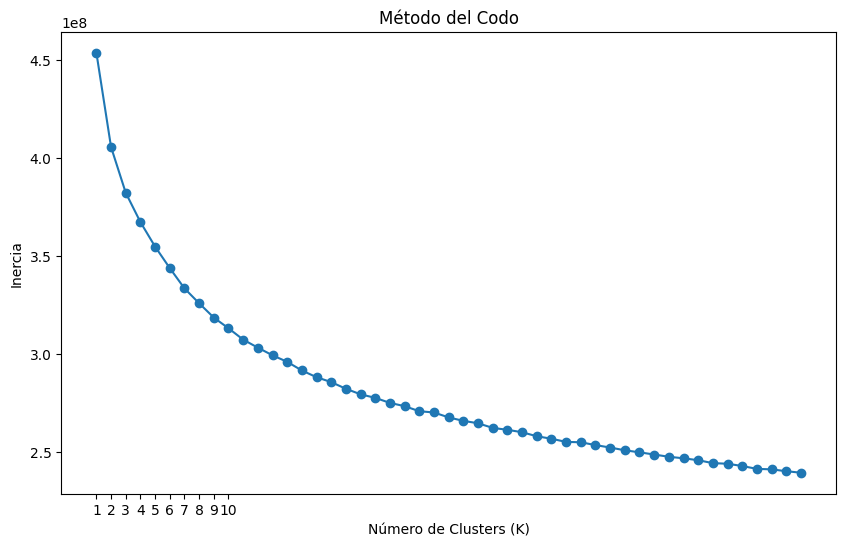

In [ ]:
#Esta celda de codigo se ejecuta unicamente con el fin de realizar el metodo ELBOW para determinar el K optimo
#que deberia tener el diccionario, esto se determina finalmente mediante analisis visual de la tabla (k=25 aprox)

# Calcular inercias para diferentes valores de K
inertia_values = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(feat_train[0])  # Reemplaza tus_caracteristicas con tus datos
    inertia_values.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), inertia_values, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(range(1, 11))
plt.show()

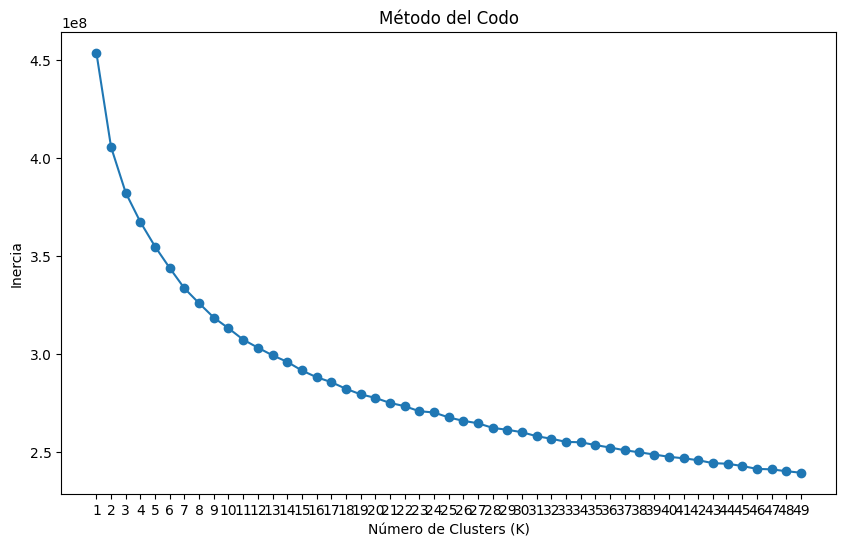

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), inertia_values, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(range(1, 50))
plt.show()

In [ ]:
#Pegue y ejecute aquí su código del entrenamiento, validación de su clasificador tradicional

#Se define una funcion para hallar el indice que ubicara a cada caracteristica en el histograma
def find_idx(feat, center):
  count = 0
  ind = 0
  for i in range (len(center)):
    if (i==0):
      count = distance.euclidean(feat, center[i])

    else:
      dist = distance.euclidean(feat, center[i])
      if(dist < count):
        ind = i
        count = dist

  return ind

In [ ]:
#Se define una funcion para hallar el histograma de frecuencias de cada imagen del data set en funcion de la cantidad
#de palabras del diccionario.
def img_histos(bovw_feat, centers):
  dict_feat={}
  for key, value in bovw_feat.items():
    imagens=[]
    for img in value:
      histo = np.zeros(len(centers))
      for each_feat in img:
        idx = find_idx(each_feat, centers)
        histo[idx]+=1
      imagens.append(histo)
    dict_feat[key]= imagens
  return dict_feat

In [ ]:
#Se ejecuta la funcion de clustering con el numero de K palabras definido previamente
k=50
diccionario_vis = clustering(k, feat_train[0])

#Se ejecuta la funcion que "entrena" el modelo de bolsa de palabras visuales
bovw_train = img_histos(feat_train[1], diccionario_vis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Se vectoriza tanto el valor como la etiqueta de cada item del diccionario
def preparar_datos(diccio):
  y = []
  x = []
  for key, values in diccio.items():
    for histo in values:
      x.append(histo)
      y.append(key)
  return np.array(x), np.array(y)

In [ ]:
#Se ejecuta la funcion anterior y se guarda en dos arreglos, uno para los labels y otro para los valores
x_train4, y_train4 = preparar_datos(bovw_train)

In [ ]:
#Se repite el proceso para el conjunto de TEST
feat_test4 = features(prueba_imagenes4)[1]
bovw_test4 = img_histos(feat_test4, diccionario_vis)
x_test4, y_test4 = preparar_datos(bovw_test4)

In [ ]:
#Se estandarizan los datos (normalizar)
std = StandardScaler().fit(x_train4)
x_train4 = std.transform(x_train4)
x_test4 = std.transform(x_test4)

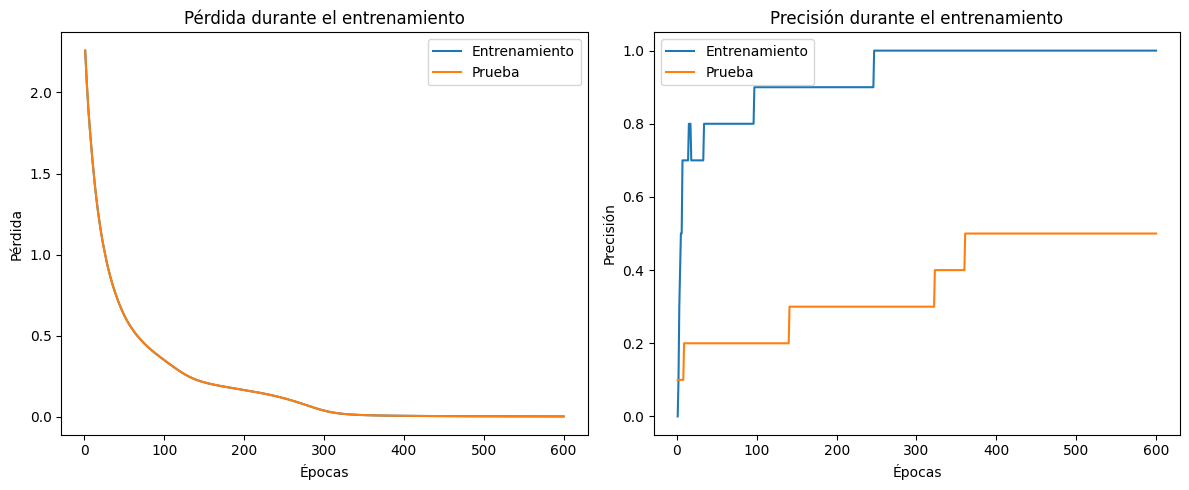

Accuracy en entrenamiento: 1.00
Accuracy en prueba: 0.50
Loss en entrenamiento: 0.00
Loss en prueba: 0.00


In [ ]:
# Crear un modelo MLP
mlp4 = MLPClassifier(hidden_layer_sizes=(80, 10), activation='relu', solver='adam', max_iter=1)

# Listas para almacenar las métricas
train_loss_history4 = []
train_accuracy_history4 = []
test_loss_history4 = []
test_accuracy_history4 = []

# Entrenar el modelo y registrar métricas en cada época
num_epochs = 600  # Cambia este valor según tu preferencia
for epoch in range(num_epochs):
    mlp4.partial_fit(x_train4, y_train4, classes=np.unique(y_train4))

    # Calcular y registrar la pérdida y la precisión en el conjunto de entrenamiento
    y_train_pred4 = mlp4.predict(x_train4)
    train_loss4 = mlp4.loss_
    train_accuracy4 = accuracy_score(y_train4, y_train_pred4)

    # Calcular y registrar la pérdida y la precisión en el conjunto de prueba
    y_test_pred4 = mlp4.predict(x_test4)
    test_loss4 = mlp4.loss_
    test_accuracy4 = accuracy_score(y_test4, y_test_pred4)

    train_loss_history4.append(train_loss4)
    train_accuracy_history4.append(train_accuracy4)
    test_loss_history4.append(test_loss4)
    test_accuracy_history4.append(test_accuracy4)

# Crear gráficos
epochs = range(1, num_epochs + 1)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history4, label='Entrenamiento')
plt.plot(epochs, test_loss_history4, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history4, label='Entrenamiento')
plt.plot(epochs, test_accuracy_history4, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

plt.tight_layout()
plt.show()

print(f'Accuracy en entrenamiento: {train_accuracy4:.2f}')
print(f'Accuracy en prueba: {test_accuracy4:.2f}')
print(f'Loss en entrenamiento: {train_loss4:.2f}')
print(f'Loss en prueba: {test_loss4:.2f}')

In [ ]:
#Una vez entrenado el modelo, se predicen los datos del conjunto de datos de testeo
p4 = mlp4.predict(x_test4)

In [ ]:
M4 = confusion_matrix(y_test4, p4)

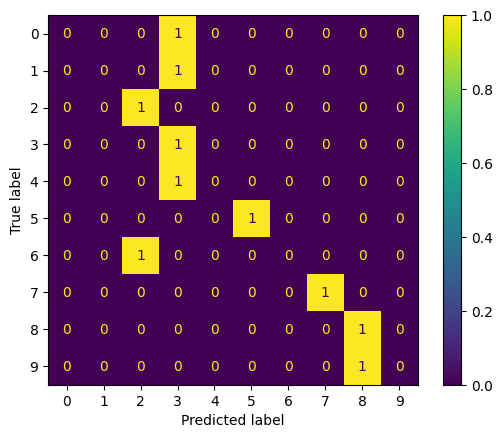

In [ ]:
cm4 = confusion_matrix(y_test4, p4, labels = mlp4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = mlp4.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test4, p4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.33      0.50      0.37        10
weighted avg       0.33      0.50      0.37        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
